Uk energy

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# Reduce df
df = pd.read_csv("repd-october-2022.csv", encoding='"ISO-8859-1"')
reduced_df = df[['Ref ID', 'Site Name', 'Technology Type', 'Under Construction', 'Operational',
                'Country', 'Post Code', 'X-coordinate', 'Y-coordinate', 'Installed Capacity (MWelec)']]


reduced_df = reduced_df[(reduced_df['Operational'].isna() == False)]

reduced_df['Operational'] = pd.to_datetime(reduced_df['Operational'], infer_datetime_format=True, errors='ignore')


C:\Users\AidanLaptop\AppData\Local\Temp\ipykernel_5184\2431960703.py:9: UserWarning: Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  reduced_df['Operational'] = pd.to_datetime(reduced_df['Operational'], infer_datetime_format=True, errors='ignore')
C:\Users\AidanLaptop\AppData\Local\Temp\ipykernel_5184\2431960703.py:9: UserWarning: Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  reduced_df['Operational'] = pd.to_datetime(reduced_df['Operational'], infer_datetime_format=True, errors='ignore')
C:\Users\AidanLaptop\AppData\Local\Temp\ipykernel_5184\2431960703.py:9: UserWarning: Parsing '27/06/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  reduced_df['Operational'] = pd.to_datetime(reduced_df['Operational'], infer_datetime_format=True, errors='ignore')
C:\Users\AidanLaptop\AppData\Local

In [3]:
reduced_df[reduced_df['Installed Capacity (MWelec)'].isna()]

reduced_df = reduced_df.dropna(subset = ['Installed Capacity (MWelec)'])


In [4]:
other_list = ['EfW Incineration', 'Anaerobic Digestion', 'Hot Dry Rocks (HDR)', 'Liquid Air Energy Storage',
             'Compressed Air Energy Storage', 'Landfill Gas', 'Sewage Sludge Digestion', 'Shoreline Wave',
             'Tidal Barrage and Tidal Stream', 'Advanced Conversion Technologies']

recent = reduced_df[reduced_df['Operational'] > datetime.strptime('2008-01-01', '%Y-%m-%d')].copy()

recent['Technology Type'] = recent['Technology Type'].replace(other_list, 'Other')
recent['Technology Type'] = recent['Technology Type'].replace(['Biomass (dedicated)', 'Biomass (co-firing)'], 'Biomass')
recent['Technology Type'] = recent['Technology Type'].replace(['Small Hydro', 'Large Hydro'], 'Biomass')

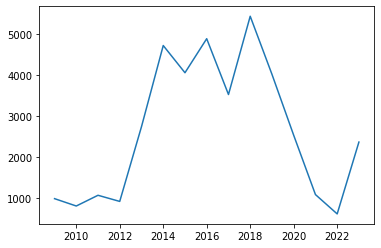

In [9]:
reduced_year_capacity = recent.groupby(pd.Grouper(key='Operational', axis=0, freq='Y')).sum()
plt.plot(reduced_year_capacity['Installed Capacity (MWelec)'])

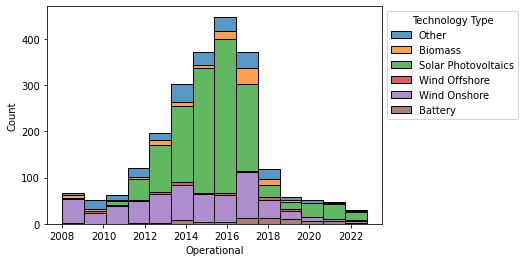

In [6]:
sns.set_palette("tab10")

fig, ax = plt.subplots()
sns.histplot(data=recent, x='Operational', hue='Technology Type', multiple='stack', palette='tab10', bins=14, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


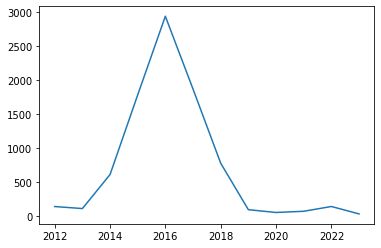

In [33]:
# Solar

solar_df = recent[recent['Technology Type'].str.contains('Solar Photovoltaics')]
solar_year_capacity = solar_df.groupby(pd.Grouper(key='Operational', axis=0, freq='Y')).sum()

plt.plot(solar_year_capacity['Installed Capacity (MWelec)'])

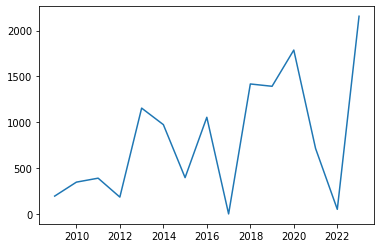

In [36]:
# Win

offshore_df = recent[recent['Technology Type'].str.contains('Wind Offshore')]
offshore_year_capacity = offshore_df.groupby(pd.Grouper(key='Operational', axis=0, freq='Y')).sum()

plt.plot(offshore_year_capacity['Installed Capacity (MWelec)'])

In [180]:
df['Technology Type']

0       Biomass (co-firing)
1       Biomass (co-firing)
2          EfW Incineration
3       Biomass (dedicated)
4       Biomass (dedicated)
               ...         
8011                Battery
8012    Solar Photovoltaics
8013                Battery
8014    Solar Photovoltaics
8015                Battery
Name: Technology Type, Length: 8016, dtype: object